In [1]:
%load_ext lab_black

In [2]:
import pandas as pd

dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ["DEV_AUTOTS"])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.37. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset - Time period is Monthly

In [3]:
datapath = "../../data/"
filename1 = "Sales_and_Marketing.csv"
dataset = pd.read_csv(datapath + filename1, index_col=None)
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


<AxesSubplot:>

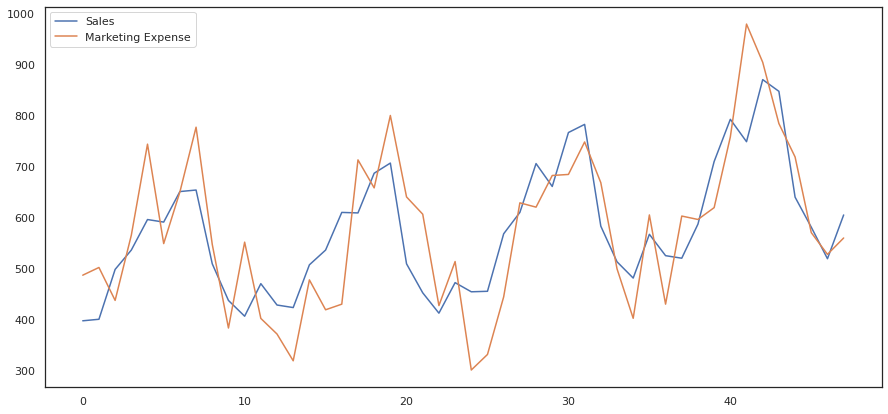

In [4]:
dataset[["Sales", "Marketing Expense"]].plot(figsize=(15, 7))

# Train Auto_TS Model but don't provide Time Period as Monthly
We will see if Auto_TS can automatically infer the Time Period as Monthly

In [5]:
ts_column = "Time Period"
target = "Sales"
sep = ","

In [6]:
FORECAST_PERIOD = 3

In [7]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [8]:
model = auto_timeseries(score_type="rmse", model_type="best", verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -3.2721577323655944      |
|           p-value           |     0.01616983190458116      |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             43.0             |
|     Critical Value (1%)     |     -3.5925042342183704      |
|     Critical Value (5%)     |      -2.931549768951162      |
|     Critical Value (10%)    |      -2.60406594375338       |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_colu

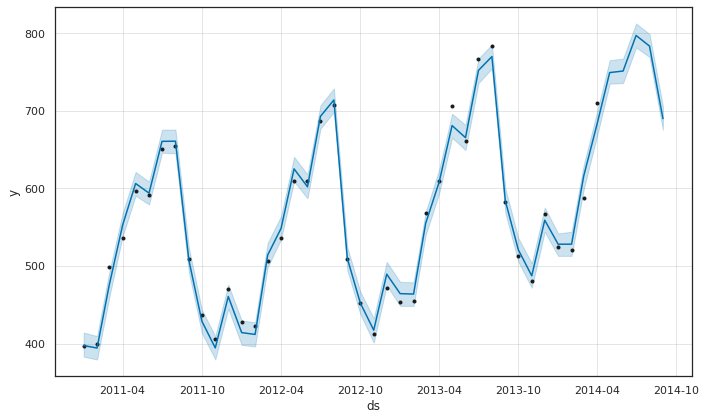

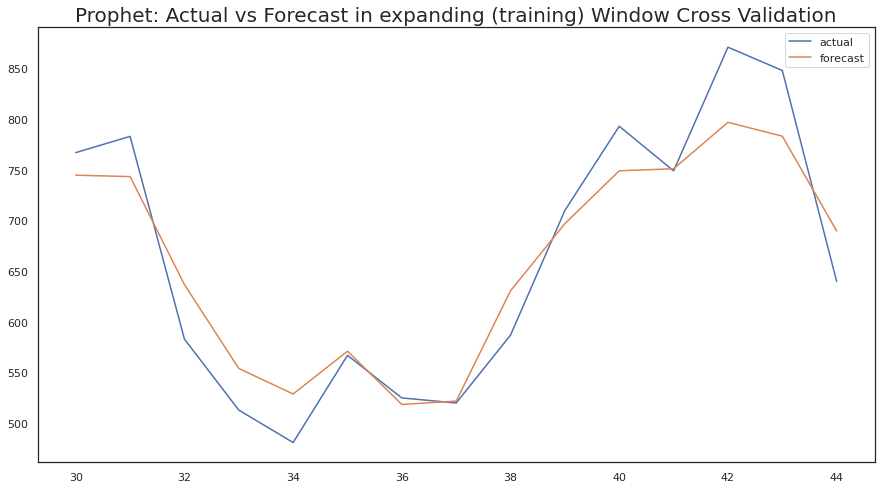

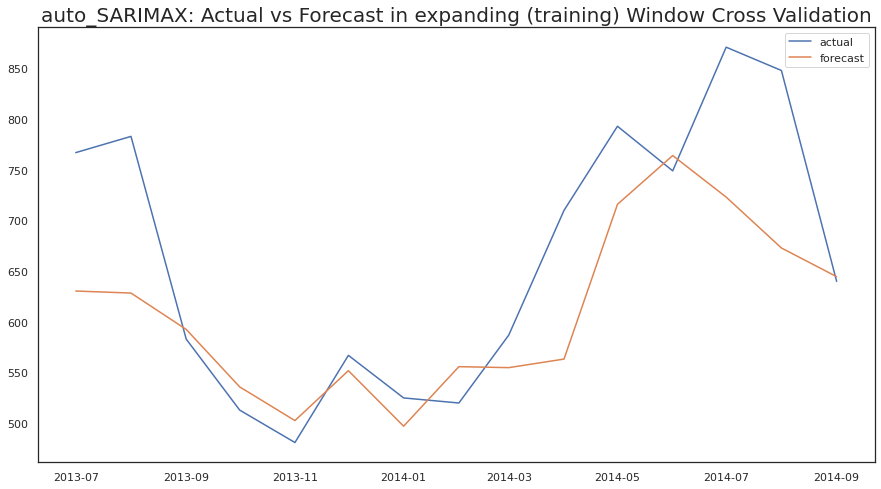

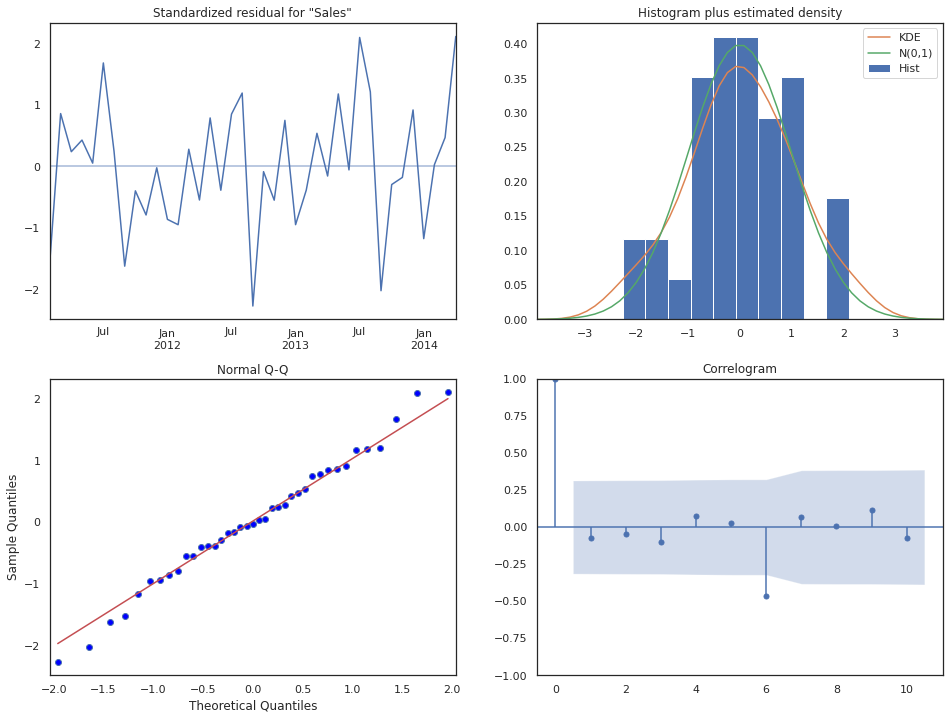

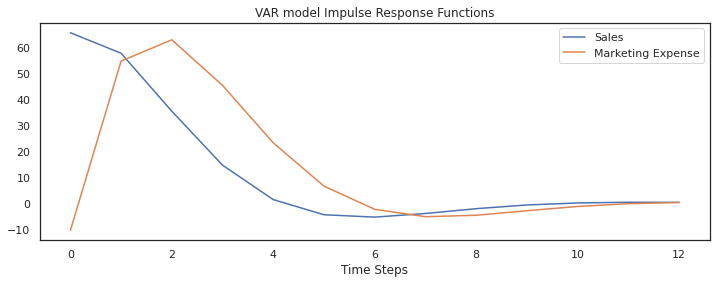

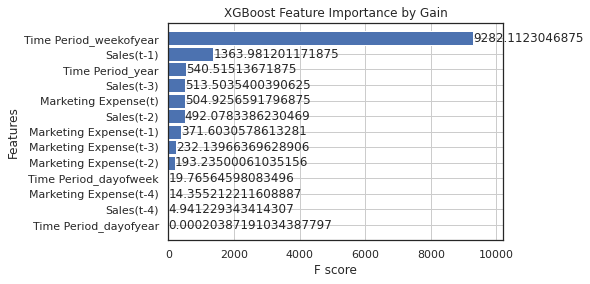

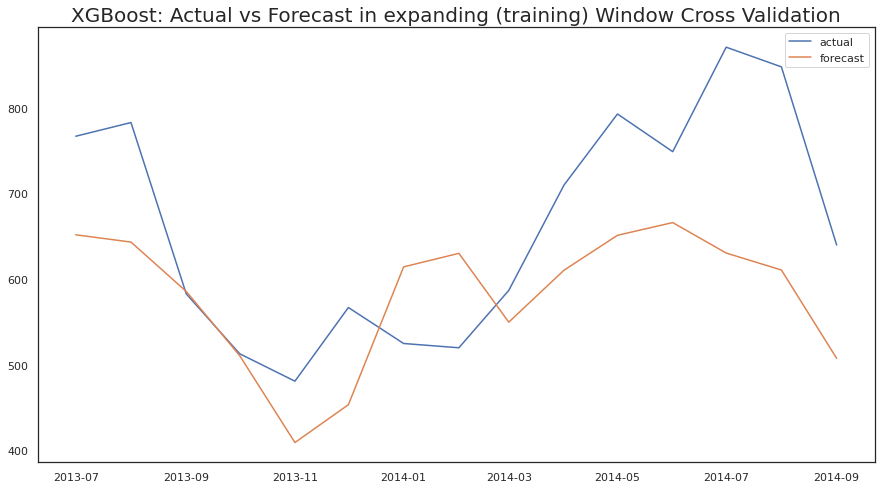

In [9]:
model.fit(traindata=train, ts_column=ts_column, target=target, cv=3, sep=sep)

# Evaluate Results

In [10]:
model.get_leaderboard()

,name,rmse
0,Prophet,38.701325
1,auto_SARIMAX,90.740810
3,ML,119.730761
2,VAR,148.417518


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

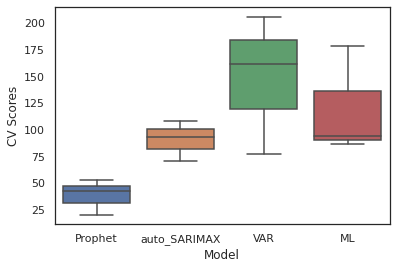

In [11]:
model.plot_cv_scores()

In [12]:
# make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,42.295439
1,Prophet,20.714386
2,Prophet,53.094148
3,auto_SARIMAX,93.396736
4,auto_SARIMAX,70.474866
5,auto_SARIMAX,108.350827
6,VAR,161.864722
7,VAR,77.625818
8,VAR,205.762014
9,ML,87.027026


In [13]:
results_dict = model.get_ml_dict()

In [14]:
results_dict["Prophet"]["forecast"]

array([744.7246755 , 743.35195519, 636.8191268 , 554.07287764,
       528.88406269, 571.09582137, 518.56464729, 521.87449107,
       630.74653908, 696.96289553, 749.06130298, 751.07731993,
       796.89239489, 783.20674921, 689.69825098])

In [15]:
results_dict["auto_SARIMAX"]["forecast"]

[array([630.44167851, 628.46224564, 592.58317172, 535.89604655,
        502.64701165]),
 array([551.9004524 , 497.12098309, 555.84572592, 554.88162586,
        563.3310132 ]),
 array([715.98932927, 764.11263272, 723.11708828, 672.92914646,
        644.61671711])]

In [16]:
results_dict["VAR"]["forecast"]

[array([591.92560023, 512.29345222, 452.47461285, 425.36171914,
        432.51788846]),
 array([502.87561793, 526.76496614, 543.89827463, 552.43120188,
        554.28340796]),
 array([675.89993065, 622.20405903, 578.38291011, 553.06751725,
        543.61294488])]

In [17]:
results_dict["ML"]["forecast"]  # it now provides forecasts

[array([651.9308 , 643.42584, 585.83276, 510.8112 , 409.34924],
       dtype=float32),
 array([453.52548, 614.4614 , 630.268  , 549.9204 , 610.57196],
       dtype=float32),
 array([651.3446 , 666.19336, 630.6322 , 610.7881 , 507.64316],
       dtype=float32)]

# Forecast Results

In [18]:
# Actual Test
test.head()

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [19]:
# Using Best Model
future_predictions = model.predict(testdata=test.drop(columns=target),)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,694.246933,585.547479,620.255785,694.176765,694.313929,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,0.0,0.0,0.0,602.797914
1,2014-11-01,700.677694,552.373570,589.895833,700.391012,701.012318,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,0.0,0.0,0.0,571.531129
2,2014-12-01,706.901011,627.342864,661.958886,706.313905,707.542792,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,0.0,0.0,0.0,642.968190


In [20]:
# Using specific model
future_predictions = model.predict(testdata=test.drop(columns=target), model="ML")
future_predictions

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    ML predictions completed


,yhat,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,502.910492,NaN,NaN,NaN
2014-11-01,452.436523,NaN,NaN,NaN
2014-12-01,461.097198,NaN,NaN,NaN


In [21]:
# Using specific model
future_predictions = model.predict(testdata=test.drop(columns=target), model="Prophet")
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,694.246933,585.457932,621.909360,694.185929,694.305142,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,-91.449018,0.0,0.0,0.0,602.797914
1,2014-11-01,700.677694,553.164550,591.370534,700.410775,700.936113,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,-129.146565,0.0,0.0,0.0,571.531129
2,2014-12-01,706.901011,623.969498,660.303694,706.364979,707.478735,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,-63.932821,0.0,0.0,0.0,642.968190


In [22]:
# Using specific model
future_predictions = model.predict(
    testdata=test.drop(columns=target), model="auto_SARIMAX"
)
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,610.250451,68.254525,476.474041,744.026862
2014-11-01,607.402977,74.591748,461.205837,753.600117
2014-12-01,627.356293,75.761677,478.866134,775.846452


In [23]:
# Using specific model
future_predictions = model.predict(testdata=test.drop(columns=target), model="VAR")
future_predictions

Sales,yhat,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,589.884765,73.666872,445.500349,734.269180
2014-11-01,566.255160,101.217361,367.872777,764.637543
2014-12-01,559.004292,113.952541,335.661417,782.347168
